<a href="https://colab.research.google.com/github/aparna-2001/machine_learning_using_python/blob/main/Regression_model_MBA_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
#reading the file

mba_salary = pd.read_csv('MBA Salary.csv')
mba_salary.head(10)

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [4]:
mba_salary.shape

(50, 3)

In [5]:
mba_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB




*   The data contains 50 rows and 3 columns
*   columns contains the percentage marks in 10th and salary
*   percentage grade in float and salary in integer data type





In [6]:
#adding a constant to the x values (not to make the y line pass through origin)

x = sm.add_constant(mba_salary['Percentage in Grade 10'])
y = mba_salary['Salary']
x.head(10)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00
5,1.0,55.00
6,1.0,70.00
7,1.0,68.00
8,1.0,82.80
9,1.0,59.00


In [7]:
#splitting the dataset into train and test data

train_x, test_x, train_y, test_y = train_test_split(x,
                 y,
                 train_size = 0.8,
                 random_state = 100)





*   0.8 means 80 percent of the data is used as training set and remaining 20 percent for validation.



In [8]:
#fitting the model

mba_salary_OLS = sm.OLS(train_y, train_x).fit()
print(mba_salary_OLS.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


Esimated model can be written as;


*   MBA salary = 3560.587383 * Percentage in Grade 10 +  30587.285652




<Figure size 800x600 with 0 Axes>

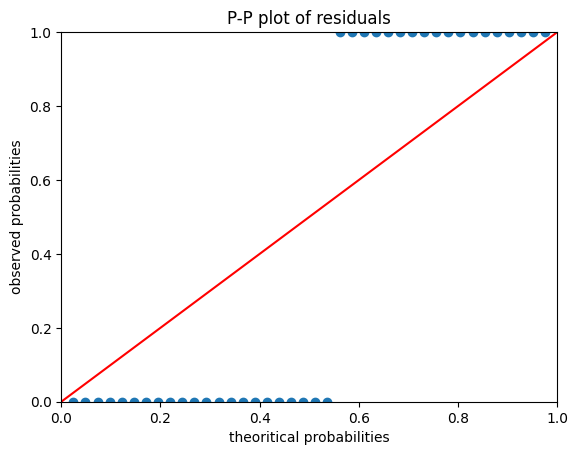

In [11]:


mba_salary_residue = mba_salary_OLS.resid
probplot = sm.ProbPlot(mba_salary_residue)
plt.figure(figsize=(8,6))
probplot.ppplot(line ='45')

plt.title('P-P plot of residuals')
plt.xlabel('theoritical probabilities')
plt.ylabel('observed probabilities')
plt.show()